## Общее описание:
Есть данные о покупках пользователей. Для решения задач необходимо провести предварительное исследование данных и сформулировать, что должно считаться покупкой. Обосновать свой выбор можно с помощью фактов оплат, статусов заказов и других имеющихся данных.



## Описание данных


**olist_customers_datase.csv** — таблица с уникальными идентификаторами пользователей
<br>
- `customer_id` — позаказный идентификатор пользователя

- `customer_unique_id` —  уникальный идентификатор пользователя  (аналог номера паспорта)

- `customer_zip_code_prefix` —  почтовый индекс пользователя

- `ustomer_city` —  город доставки пользователя

- `customer_state` —  штат доставки пользователя

**olist_orders_dataset.csv** —  таблица заказов
- `order_id` —  уникальный идентификатор заказа (номер чека)

- `customer_id` —  позаказный идентификатор пользователя

- `order_status` —  статус заказа

- `order_purchase_timestamp` —  время создания заказа

- `order_approved_at` —  время подтверждения оплаты заказа

- `order_delivered_carrier_date` —  время передачи заказа в логистическую службу

- `order_delivered_customer_date` —  время доставки заказа

- `order_estimated_delivery_date` —  обещанная дата доставки

**olist_order_items_dataset.csv** —  товарные позиции, входящие в заказы
order_id —  уникальный идентификатор заказа (номер чека)

- `order_item_id` —  идентификатор товара внутри одного заказа

- `product_id` —  ид товара (аналог штрихкода)

- `seller_id` — ид производителя товара

- `shipping_limit_date` —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

- `price` —  цена за единицу товара

- `freight_value` —  вес товара




### План

**1. Подготовка к работе. Импорт библиотек и настройка парметров визуализаций**
   
    
**2. Загрузка и предварительный анализ данных**

**3. Подготовка и обработка данных для дальнейшего анализа:**
- делаем преобразование некоторых данных к определенным типам;
- объединяем три df из трех таблиц в один;
- в целях дальнейшего анализа определяем, какие действия пользователей считать покупкой и фильтруем данные по установленному условию.
- изучаем пропущенные значения и выявляем их причины

**4. Выясняем, сколько пользователей совершили покупку только один раз.**

**5. Выясняем, сколько заказов в месяц в среднем не доставляется по разным причинам.**

**6. По каждому товару определяем, в какой день недели товар чаще всего покупается.**

**7. Выводим данные о том, сколько у каждого из пользователей в среднем покупок в неделю (по месяцам).**

**8. Проводим когортный анализ пользователей.В период с января по декабрь выявляем когорту с самым высоким retention на 3й месяц.**

**9.Строим RFM-сегментацию пользователей.**

<hr style='border: 1px solid'>

## 1. Подготовка к работе


In [2]:
# Импортируем библиотеки

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta
%matplotlib inline

In [3]:
# Подготавливаем общие настройки для графиков

sns.set(
rc={
    'figure.figsize':(46,15)
},
font_scale=2
)

<hr style='border: 1px solid'>

## 2. Загрузка и предварительный анализ данных

### 2.1. Загружаем данные с уникальными идентификаторами пользователей

In [5]:
# Считываем данные о пользователях

list_customers = pd.read_csv('./olist_customers_dataset.csv') 
list_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Смотрим размер данных

list_customers.shape

(99441, 5)

In [7]:
# Проверяем наличие повторяющихся строчек

list_customers.loc[list_customers.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [8]:
# Проверяем наличие пустых значений

list_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [9]:
# Смотрим тип переменных

list_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

### 2.2. Загружаем данные с заказами

In [10]:
# Считываем данные о заказах

list_orders = pd.read_csv('./olist_orders_dataset.csv')
list_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
# Смотрим размер данных

list_orders.shape

(99441, 8)

In [12]:
# Проверяем наличие повторяющихся строчек

list_orders.loc[list_orders.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [13]:
# Проверяем наличие пустых значений

list_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
# Смотрим тип переменных

list_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

### 2.3. Загружаем данные о товарах, входящих в заказ

In [15]:
# Считываем данные о товарах, входящих в заказ

list_order_items = pd.read_csv('./olist_order_items_dataset.csv')
list_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
# Смотрим размер данных

list_order_items.shape

(112650, 7)

In [17]:
# Проверяем наличие повторяющихся строчек

list_order_items.loc[list_order_items.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [18]:
# Смотрим тип переменных

list_order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

<hr style='border: 1px solid'>

## 3. Подготовка и обработка данных для дальнейшего анализа

### 3.1. Преобразование типов данных и объединение трех df в один.

In [19]:
# Смотрим, какие столбцы из данных о заказах нужно перевести в datetime формат

list_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [20]:
# Переводим столбцы в datetime формат

list_orders[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']] = list_orders[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

In [21]:
# Проделываем то же самое в отношении данных о товарах, входящих в заказ

list_order_items['shipping_limit_date'] = pd.to_datetime(list_order_items['shipping_limit_date'])

In [22]:
# Поскольку каждая из таблиц связана с другой, 
# для того, чтобы была единая информация об идентификаторах пользователей,
# их заказах и товарных позициях, входящих в заказы,
# объединяем таблицы в единый df 

full_data = list_customers.merge(list_orders, on='customer_id').merge(list_order_items, on='order_id')

In [23]:
full_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


<b>В целях анализа данных будем считать покупками те заказы, у которых:
   <br>
    <br>
1) в столбце 'order_approved_at' не пустое значение, т.е. подтверждена серьезность намерений 
<br>
    по приобретению товара в виде  оплаты товара;
<br>
    <br>
2) статус товара (order_status) не 'canceled',
 т.е. когда покупатель не отменил в дальнейшем свой заказ;
<br>
    <br>
3) статус unavailable исключать не будем, поскольку в рамках выполнения некоторых заданий
<br>(напр., при определении, в какой день недели товар чаще всего покупается) нас, прежде всего, будут интересовать
<br>
 особенности потребностей клиентов в зависимости от тех или иных факторов,
<br>а unavailable присваивается по независящей от спроса
покупаталей причине (товара нет на складе).
</b>


In [24]:
# На основе full_data создаем новый df, фильтруя значения по вышеуказанным условиям совершения покупки

data_purchased_items = full_data[full_data['order_status'] != 'canceled'].dropna(subset=['order_approved_at'])

In [25]:
# Изучаем получившиеся данные
# Смотрим, какой период охватывают данные о покупках

print(f' Мин. дата: {data_purchased_items.order_approved_at.min()}, \n макс. дата: {data_purchased_items.order_approved_at.max()}')

 Мин. дата: 2016-09-15 12:16:38, 
 макс. дата: 2018-09-03 17:40:06


In [26]:
# Проверяем данные на наличие отсутствующих значений и видим отсутствия в датах передачи заказов в логистическую службу,
# а также в датах доставок некоторых заказов

data_purchased_items.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date      728
order_delivered_customer_date    1919
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

### 3.2. Изучаем пропущенные значения и выявляем их причины.

<b> Пытаемся понять, с чем связано отсутствие дат доставки товара и 
   <br>
передачи заказа в логистическую службу в некоторых строках данных.
    <br>
    Возможно, есть какие-то сбои в данных. </b>

In [27]:
# Фильтруем данные по отсутствию в столбцах о времени передачи заказа в логистическую службу
# и времени доставки заказа вышеуказанных дат.

data_with_empty_dates = data_purchased_items[(data_purchased_items['order_delivered_customer_date'].isna()) | (data_purchased_items['order_delivered_carrier_date'].isna())]

In [28]:
data_with_empty_dates.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
50,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24,1,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35
78,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20,1,13c270dd3d811877114b2a225436a79a,77530e9772f57a62c906e1c21538ab82,2018-01-26 13:52:40,49.00,25.38
89,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaT,2018-02-09,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61
111,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaT,2017-09-11,1,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69
125,8891eb5ca0e28df961b2b5b8f3c0eb23,13ac6da47fef1b17b16f511e03b57918,2632,sao paulo,SP,ff536d93ae4214b4d51c2894ccfc569f,shipped,2017-12-21 09:01:00,2017-12-22 12:33:26,2018-01-03 18:22:09,NaT,2018-01-10,1,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,2017-12-29 12:32:10,39.00,8.27


In [29]:
# Для дальнейшей группировки статусов заказов и подсчета для каждого из них
# отсутствующих дат преобразовываем отсутствующие значения в двух столбцах в 1 и 0

data_with_empty_dates = data_with_empty_dates \
.assign(order_delivered_carrier_date = data_with_empty_dates.order_delivered_carrier_date.isna().astype(int)) \
.assign(order_delivered_customer_date = data_with_empty_dates.order_delivered_customer_date.isna().astype(int))

In [30]:
data_with_empty_dates.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
50,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,1,1,2018-05-24,1,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35
78,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,0,1,2018-02-20,1,13c270dd3d811877114b2a225436a79a,77530e9772f57a62c906e1c21538ab82,2018-01-26 13:52:40,49.00,25.38
89,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,0,1,2018-02-09,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61
111,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,0,1,2017-09-11,1,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69
125,8891eb5ca0e28df961b2b5b8f3c0eb23,13ac6da47fef1b17b16f511e03b57918,2632,sao paulo,SP,ff536d93ae4214b4d51c2894ccfc569f,shipped,2017-12-21 09:01:00,2017-12-22 12:33:26,0,1,2018-01-10,1,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,2017-12-29 12:32:10,39.00,8.27


In [31]:
# Группируем данные по статусу заказа и считаем для каждого статуса кол-во пропущенных дат 
# в order_delivered_carrier_date и order_delivered_customer_date

grouped_data_empty_dates = data_with_empty_dates.groupby('order_status', as_index=False) \
.agg({'order_delivered_carrier_date':'sum','order_delivered_customer_date':'sum'})

In [32]:
grouped_data_empty_dates

,order_status,order_delivered_carrier_date,order_delivered_customer_date
0,approved,3,3
1,delivered,2,8
2,invoiced,359,359
3,processing,357,357
4,shipped,0,1185
5,unavailable,7,7


<b> Видим, что в основном отсутствие дат в столбцах order_delivered_carrier_date и order_delivered_customer_date
    <br>
 объясняется тем, что заказ еще на первых этапах движения - либо он только отгружен со склада,
    <br>
 либо еще в процессе сборки, либо за него только выставлен счет.

 В то же время, у некоторых заказов при наличии финального статуса движения товара (delivered)
<br>
    по какой-то причине отсутствуют соответствующие даты .
<br>
    Есть вероятность, что данные заказы на самом деле не доставлены, их точный статус нам не известен,
<br>
    поэтому на всякий случай удаляем соответствующие строки из датафрейма с покупками. </b>

In [33]:
# Будем удалять строки со статусом delivered и пропущенными датами по индексам строк.
# Выводим соответствующие строки.

data_with_empty_dates.query('order_status == "delivered"').index

Int64Index([10270, 13643, 15179, 58555, 96715, 98532, 98776, 101057, 110621], dtype='int64')

In [34]:
# Удаляем из df с покупками такие строки

data_purchased_items.drop(labels=[10270, 13643, 15179, 58555, 96715, 98532, 98776, 101057, 110621], inplace=True)


In [35]:
data_purchased_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


<hr style='border:1px solid'>

## 4. Сколько пользователей, которые совершили покупку только один раз?

In [36]:
# Для того, чтобы понять, сколько пользователей совершили только 1 покупку, 
# необходимо сделать группировку по уникальным id пользователей
# и отфильтровать данные по признаку единственного значения customer_id

data_delivered_grouped = data_purchased_items.groupby('customer_unique_id') \
.agg({'customer_id':'count'}) \
.query('customer_id == 1') \
.rename(columns={'customer_id':'purchase'})

In [35]:
# Выведем кол-во строк в получившемся df - первое значение в кортеже и будет кол-во пользователей с 1 покупкой

data_delivered_grouped.shape

(83164, 1)

<b> Вывод: 83164 пользователей совершили только одну покупку </b>

<hr style='border: 1px solid'>

## 5. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

<b> Для начала необходимо определить, какие заказы мы будем считать недоставленными и
<br>по каким причинам заказы могут не доставляться. 
<br><br>
    Заказами, которые не доставляются, мы будем считать заказы, у которых отсутствует значение в столбце 
<br>'order_delivered_customer_date', при этом мы не будем брать в расчет те заказы, 
<br>у которых любые статусы, кроме 'canceled' и 'unavailable', 
<br>т.к. такие заказы, со статусами approved, created, shipped и т.д.,
<br> еще могут быть доставлены покупателю, поскольку они в процессе движения.
    
<br>Мы также не будем брать в расчет те заказы, у которых статус 'delivered' и дата 
<br> доставки отсутствует, поскольку такие заказы могут быть как доставлены на самом деле,
<br> просто из-за сбоя дата доставки не сохранилась, так и не быть доставлены и статус 'delivered'
<br> ошибочный. В любом случае, по таким заказам тяжело точно определить, были ли они все-таки доставлены или нет. 
<br><br>
    Таким образом, заказы могут не доставляться либо по причине отмены заказа покупателем (статус заказа 'canceled'), 
<br>либо по причине недоступности товара в заказе (статус заказа 'unavailable'). 

</b>
    

In [36]:
# На основе df full_data создаем новые данные, фильтруя full_data
# по статусу заказов (оставим только статусы 'canceled' и 'unavailable')

# Оставим в новом df только столбцы статуса заказа, даты оплаты заказа и номера заказа, остальные столбцы не понадобятся.

not_delivered_orders = full_data[['order_status','order_approved_at','order_id']].query('order_status == "canceled" or order_status == "unavailable"').copy()

In [37]:
not_delivered_orders.head()

,order_status,order_approved_at,order_id
424,canceled,2018-01-30 22:34:14,a402af38a74c44926247db438245d95c
426,canceled,2017-06-19 14:23:18,f63cd97f8f1db2eb266fb3bc2b4a95f3
457,canceled,2018-06-13 21:20:38,5bca61e411c4fcce08327a8efc371911
985,canceled,2018-02-15 21:06:43,5b4858f2dcf69731f2285a38829bfa7c
1137,canceled,2018-08-10 21:30:18,cadd4c5765abf658117f2cc7e2a639c2


In [38]:
# На основе даты подтверждения оплаты заказа создаем новую колонку с месяцем заказа товара

not_delivered_orders['month'] = not_delivered_orders.order_approved_at.dt.month

In [39]:
# Группируем данные по месяцам и причине отмены заказов и считатем кол-во недоставленных заказов

grouped_not_delivered_orders = not_delivered_orders.groupby(['month','order_status'], as_index=False) \
.agg({'order_id':'count'}) \
.rename(columns={'order_id':'orders_count'})

In [40]:
grouped_not_delivered_orders

,month,order_status,orders_count
0,1,canceled,36
1,2,canceled,91
2,3,canceled,47
3,4,canceled,40
4,5,canceled,57
5,6,canceled,32
6,7,canceled,78
7,8,canceled,61
8,9,canceled,16
9,10,canceled,37


In [41]:
# перестраиваем таблицу и заменяем пропущенные значения статуса "unavailable" на 0

grouped_not_delivered_orders = grouped_not_delivered_orders.pivot(index='month', columns='order_status', values='orders_count').fillna(0)

In [42]:
grouped_not_delivered_orders

order_status,canceled,unavailable
month,,
1,36.0,0.0
2,91.0,0.0
3,47.0,0.0
4,40.0,0.0
5,57.0,0.0
6,32.0,0.0
7,78.0,0.0
8,61.0,0.0
9,16.0,0.0


In [43]:
# Выводим средние недоставленных заказов в месяц и округляем полученные средние

average_undelivered_orders = grouped_not_delivered_orders[['canceled','unavailable']].mean().round()

In [44]:
average_undelivered_orders

order_status
canceled       45.0
unavailable     1.0
dtype: float64

<b> Вывод: в среднем по причине отмены заказы не доставляются 45 раз в месяц, по причине недоступности товара - 1 раз в месяц. </b>

<hr style='border:1px solid'>

## 6. По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [45]:
# На основе данных о покупках создаем новый df, с которой будем работать в рамках данного задания.

purchases_day_of_week = data_purchased_items[['product_id','order_id','order_approved_at']].copy()

In [46]:
# Создаем колонку с днем недели покупки

purchases_day_of_week['weekday'] = purchases_day_of_week.order_approved_at.dt.day_name()

In [47]:
purchases_day_of_week

,product_id,order_id,order_approved_at,weekday
0,a9516a079e37a9c9c36b9b78b10169e8,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,Tuesday
1,4aa6014eceb682077f9dc4bffebc05b0,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,Friday
2,bd07b66896d6f1494f5b86251848ced7,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,Sunday
3,a5647c44af977b148e0a3a4751a09e2e,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,Tuesday
4,9391a573abe00141c56e38d84d7d5b3b,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,Sunday
...,...,...,...,...
112645,ccb4503d9d43d245d3b295d0544f988b,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 16:08:45,Saturday
112646,9ede6b0570a75a4b9de4f383329f99ee,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:35:12,Wednesday
112647,7a5d2e1e131a860ae7d18f6fffa9d689,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:30:03,Sunday
112648,f819f0c84a64f02d3a5606ca95edd272,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:31:20,Friday


In [48]:
# Группируем данные по дню недели и товару и считаем покупки

purchases_day_of_week = purchases_day_of_week.groupby(['weekday','product_id'], as_index=False) \
.agg({'order_id':'count'}) \
.rename(columns={'order_id':'purchases'}) 

In [49]:
purchases_day_of_week.head()

,weekday,product_id,purchases
0,Friday,0009406fd7479715e4bef61dd91f2462,1
1,Friday,000b8f95fcb9e0096488278317764d19,1
2,Friday,001795ec6f1b187d37335e1c4704762e,1
3,Friday,001b237c0e9bb435f2e54071129237e9,1
4,Friday,001b72dfd63e9833e8c02742adf472e3,2


In [50]:
# Группируем получившиеся данные по product_id и выводим для каждого товара максимальное значение покупок

days_of_max_purchases = purchases_day_of_week.loc[purchases_day_of_week.groupby('product_id').purchases.idxmax()].sort_values('purchases', ascending=False).reset_index(drop=True)

In [51]:
days_of_max_purchases

,weekday,product_id,purchases
0,Tuesday,aca2eb7d00ea1a7b8ebd4e68314663af,119
1,Tuesday,53b36df67ebb7c41585e8d54d6772e08,105
2,Tuesday,422879e10f46682990de24d770e7f83d,89
3,Tuesday,99a4788cb24856965c36a24e339b6058,82
4,Thursday,368c6c730842d78016ad823897a372db,80
...,...,...,...
32724,Friday,628d0ba951ebb8fd1edc5ab3934468e0,1
32725,Saturday,628cfb8a45c95a7b796ea06b006e9384,1
32726,Friday,628b17449083fb34688b2959b80bdecd,1
32727,Friday,62892a47bea324c325a4556b66baef9d,1


<hr style='border: 1px solid'>

## 7. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
## Не стоит забывать, что внутри месяца может быть не целое количество недель. 
## Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

In [52]:
# На основе данных о покупках создаем новый df с уникальными id покупателей, id заказов и датами подтверждениями заказов.

purchases_per_week = data_purchased_items[['customer_unique_id','order_id','order_approved_at']].copy()

In [53]:
purchases_per_week.head()

,customer_unique_id,order_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09


<b>В рамках данного задания нас интересует вычисление среднего кол-ва покупок (order_id). 
<br>Некоторые ряды в данных о покупках содержат один и тот же заказ, поскольку в рамках
<br> заказа может быть несколько товаров (как в примере ниже).
  <br>
<br> В связи с вышеуказанным необходимо будет удалить повторяющиеся ряды с одним и тем же id заказа. </b>



In [54]:
data_purchased_items.loc[data_purchased_items.customer_unique_id == "830d5b7aaa3b6f1e9ad63703bec97d23"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
24001,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
24002,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
24003,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83


In [55]:
# Оставляем уникальные заказы (покупки) в наших данных

purchases_per_week = purchases_per_week.drop_duplicates().copy()

In [56]:
# Переводим колонку order_approved_at в простую дату (без времени)

purchases_per_week['order_approved_at'] = pd.to_datetime(purchases_per_week['order_approved_at']).dt.normalize()

In [57]:
# Сортируем для удобства даты по возрастанию

purchases_per_week = purchases_per_week.sort_values('order_approved_at')

In [58]:
purchases_per_week.head()

,customer_unique_id,order_id,order_approved_at
24001,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09-15
19889,14359ea0c7a105749c0a56478825b015,1ff217aa612f6cd7c4255c9bfe931c8b,2016-10-04
14410,3f4f614c632af7fc7508462a7cb55ac2,c4b41c36dd589e901f6879f25a74ec1d,2016-10-04
22599,87776adb449c551e74c13fc34f036105,cd3b8574c82b42fc8129f6d502690c3e,2016-10-04
21937,7390ed59fa1febbfda31a80b4318c8cb,ae8a60e4b03c5a4ba9ca0672c164b181,2016-10-04


In [59]:
# Смотрим минимальную и максимальную даты в данных

print(f' Мин. дата: {purchases_per_week.order_approved_at.min()}, \n макс. дата: {purchases_per_week.order_approved_at.max()}')

 Мин. дата: 2016-09-15 00:00:00, 
 макс. дата: 2018-09-03 00:00:00


In [60]:
# Создаем диапозон дат покупок с частотой в день.
# Эти данные понадобятся, чтобы по ним увидеть кто в какой день делал покупки и делал ли.

dates = pd.date_range(start='2016-09-15', end='2018-09-03', freq='D')

In [61]:
dates = dates.to_frame()

In [62]:
dates = dates.reset_index().drop(columns='index').rename(columns={0:'order_approved_at'})

In [63]:
dates

,order_approved_at
0,2016-09-15
1,2016-09-16
2,2016-09-17
3,2016-09-18
4,2016-09-19
...,...
714,2018-08-30
715,2018-08-31
716,2018-09-01
717,2018-09-02


In [64]:
# Объединяем наш основной df с df датами таким образом, чтобы в столбце 'order_approved_at'
# были все даты из df с датами, следовательно, по пропущенным значениям в столбцах 'customer_unique_id' 
# и 'order_id' будет видно, кто в какой день покупал или не покупал.

purchases_per_week = purchases_per_week.merge(dates, how='right')

In [65]:
purchases_per_week.head(20)

,customer_unique_id,order_id,order_approved_at
0,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09-15
1,NaN,NaN,2016-09-16
2,NaN,NaN,2016-09-17
3,NaN,NaN,2016-09-18
4,NaN,NaN,2016-09-19
5,NaN,NaN,2016-09-20
6,NaN,NaN,2016-09-21
7,NaN,NaN,2016-09-22
8,NaN,NaN,2016-09-23
9,NaN,NaN,2016-09-24


In [66]:
# Заменяем пропущенные значения в столбце order_id на 0, если же покупка была - на 1.

purchases_per_week['order_id'] = purchases_per_week['order_id'].notna().astype(int)

In [67]:
purchases_per_week

,customer_unique_id,order_id,order_approved_at
0,830d5b7aaa3b6f1e9ad63703bec97d23,1,2016-09-15
1,NaN,0,2016-09-16
2,NaN,0,2016-09-17
3,NaN,0,2016-09-18
4,NaN,0,2016-09-19
...,...,...,...
98286,NaN,0,2018-08-30
98287,NaN,0,2018-08-31
98288,NaN,0,2018-09-01
98289,NaN,0,2018-09-02


In [68]:
# Для подсчета среднего покупок в неделю по месяцам необходимо 
# создать столбец с месяцем и годом напротив значения из столбца 'order_approved_at'

purchases_per_week['month_and_year'] = purchases_per_week['order_approved_at'].dt.to_period('M')

In [69]:
purchases_per_week.head()

,customer_unique_id,order_id,order_approved_at,month_and_year
0,830d5b7aaa3b6f1e9ad63703bec97d23,1,2016-09-15,2016-09
1,NaN,0,2016-09-16,2016-09
2,NaN,0,2016-09-17,2016-09
3,NaN,0,2016-09-18,2016-09
4,NaN,0,2016-09-19,2016-09


In [70]:
# Группируем данные по покупателям и месяцу покупки и считаем общее кол-во покупок по месяцам для каждого пользователя

purchases_per_week = purchases_per_week.groupby(['customer_unique_id','month_and_year'], as_index = False) \
.agg({'order_id':'count'}) \
.rename(columns={'order_id':'purchases'}) \
.sort_values('purchases', ascending=False)

In [71]:
purchases_per_week.head()

,customer_unique_id,month_and_year,purchases
7232,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6
61432,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4
66918,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4
68536,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4
23644,3e43e6105506432c953e165fb2acf44c,2018-02,4


<b> Таким образом, мы  сгруппировали кол-во покупок по каждому пользователю и месяцу, в котором он делал эти покупки.
<br>Далее, для того, чтобы посчитать среднее покупок по месяцам в неделю для каждого покупателя, 
<br>необходимо сначала вычислить для каждого месяца кол-во недель в этом месяце.</b>

In [72]:
# Создаем функцию, которая будет принимать параметром значение столбца 'month_and_year',
# и в зависимости от кол-ва недель в месяце возвращать 4 или 5.

def calculating_number_of_weeks(x):
    x = x.to_timestamp().daysinmonth
    if x == 28:
        n = 4
    elif x == 29 or x == 28 or x == 30 or x == 31:
        n = 5
    return n

In [73]:
# Создаем столбец с кол-вом недель для каждого месяца, применяя созданную функцию

purchases_per_week['number_of_weeks'] = purchases_per_week.month_and_year.apply(calculating_number_of_weeks)

In [74]:
purchases_per_week.head()

,customer_unique_id,month_and_year,purchases,number_of_weeks
7232,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,5
61432,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4,4
66918,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,5
68536,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4,4
23644,3e43e6105506432c953e165fb2acf44c,2018-02,4,4


In [75]:
# На основе созданного выше столбца вычисляем среднее покупок по месяцам в неделю для каждого пользователя.
# Для этого делим кол-во покупок в конкретном месяце на кол-во недель в этом месяце.


purchases_per_week['average_purchases_per_week'] = purchases_per_week.apply(lambda x: x['purchases'] / x['number_of_weeks'], axis=1)

In [76]:
# Выводим среднее количество покупок в неделю по месяцам для каждого покупателя

purchases_per_week.head()

,customer_unique_id,month_and_year,purchases,number_of_weeks,average_purchases_per_week
7232,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,5,1.2
61432,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4,4,1.0
66918,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,5,0.8
68536,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4,4,1.0
23644,3e43e6105506432c953e165fb2acf44c,2018-02,4,4,1.0


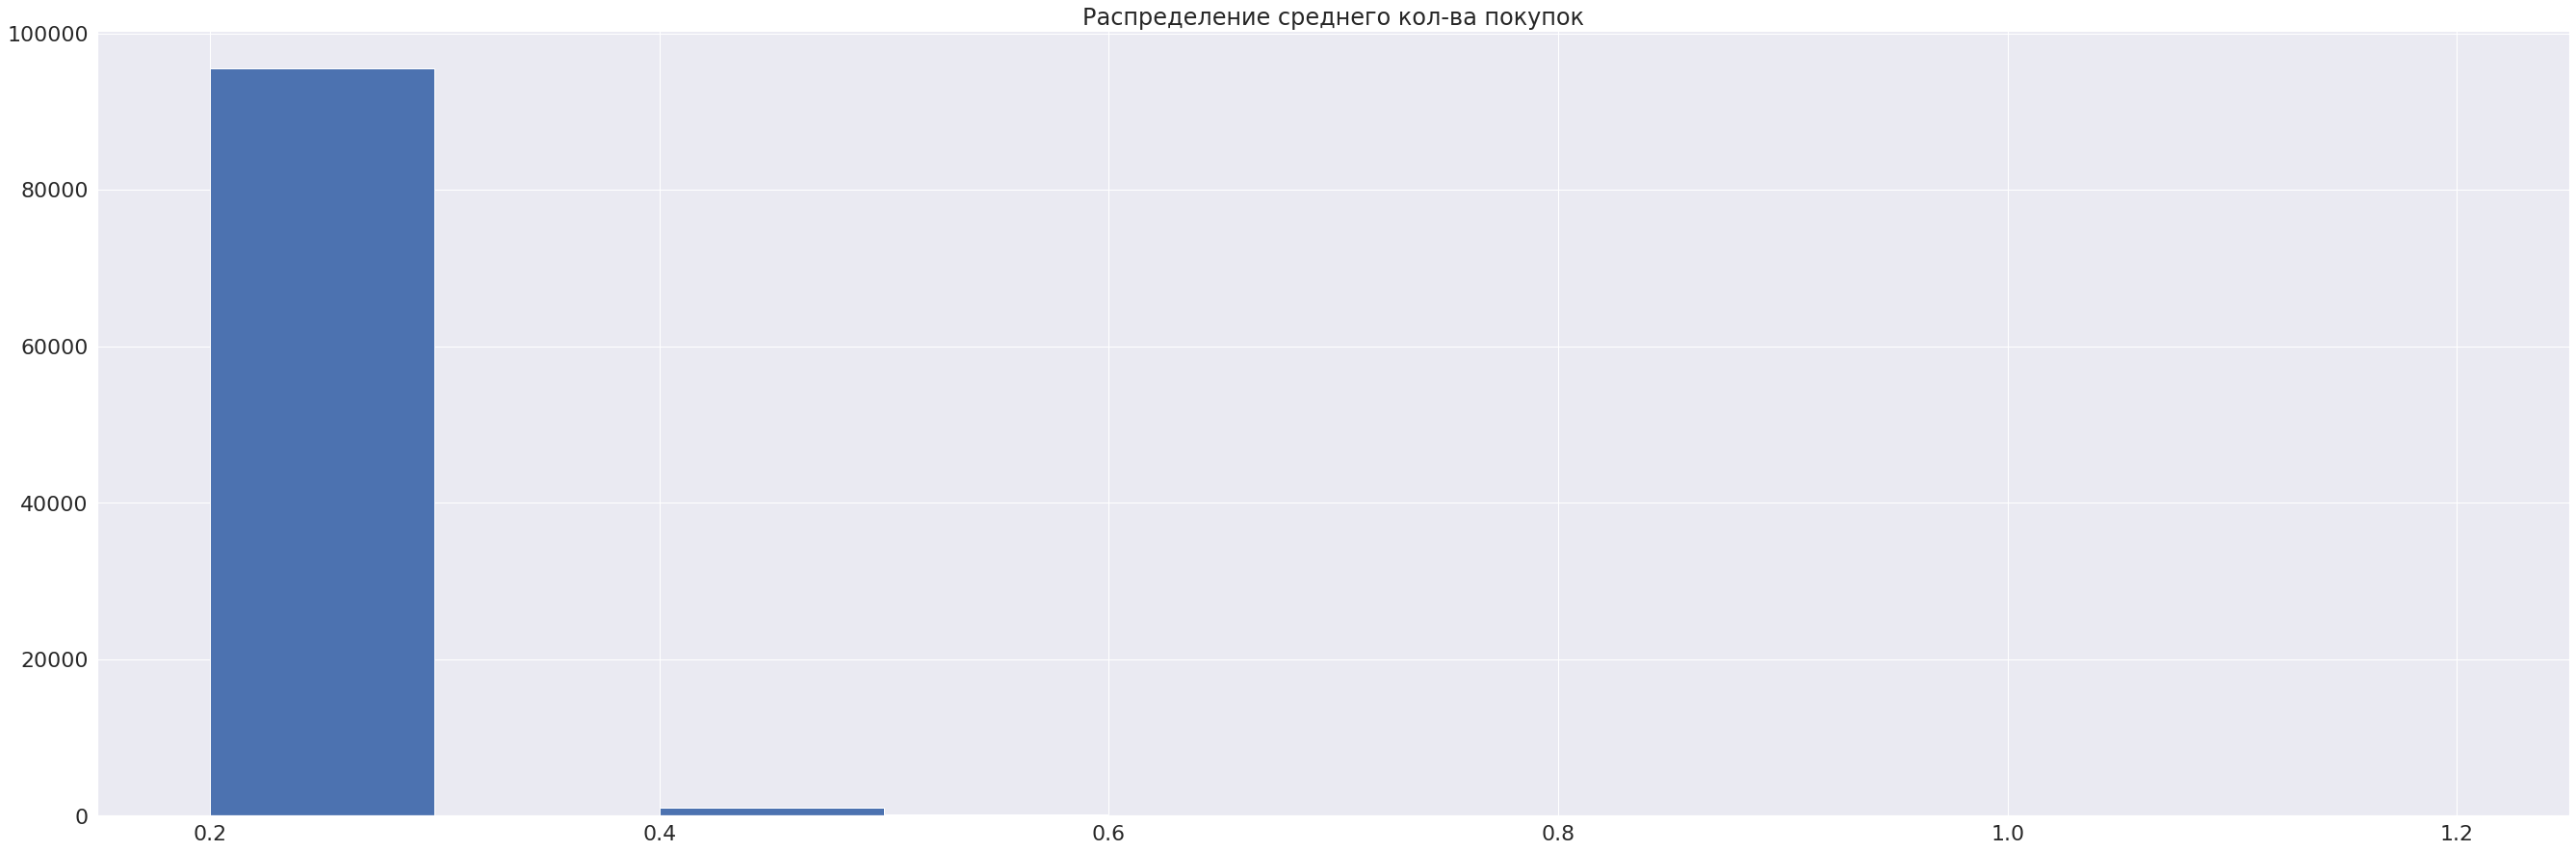

In [77]:
# Визуализируем среднее покупок у покупаталей

purchases_per_week.average_purchases_per_week.hist()
plt.title('Распределение среднего кол-ва покупок')

plt.show()

<b>Поскольку несколько значений значительно больше остальных, используем логарифмическую шкалу, чтобы лучше понимать распределение средних

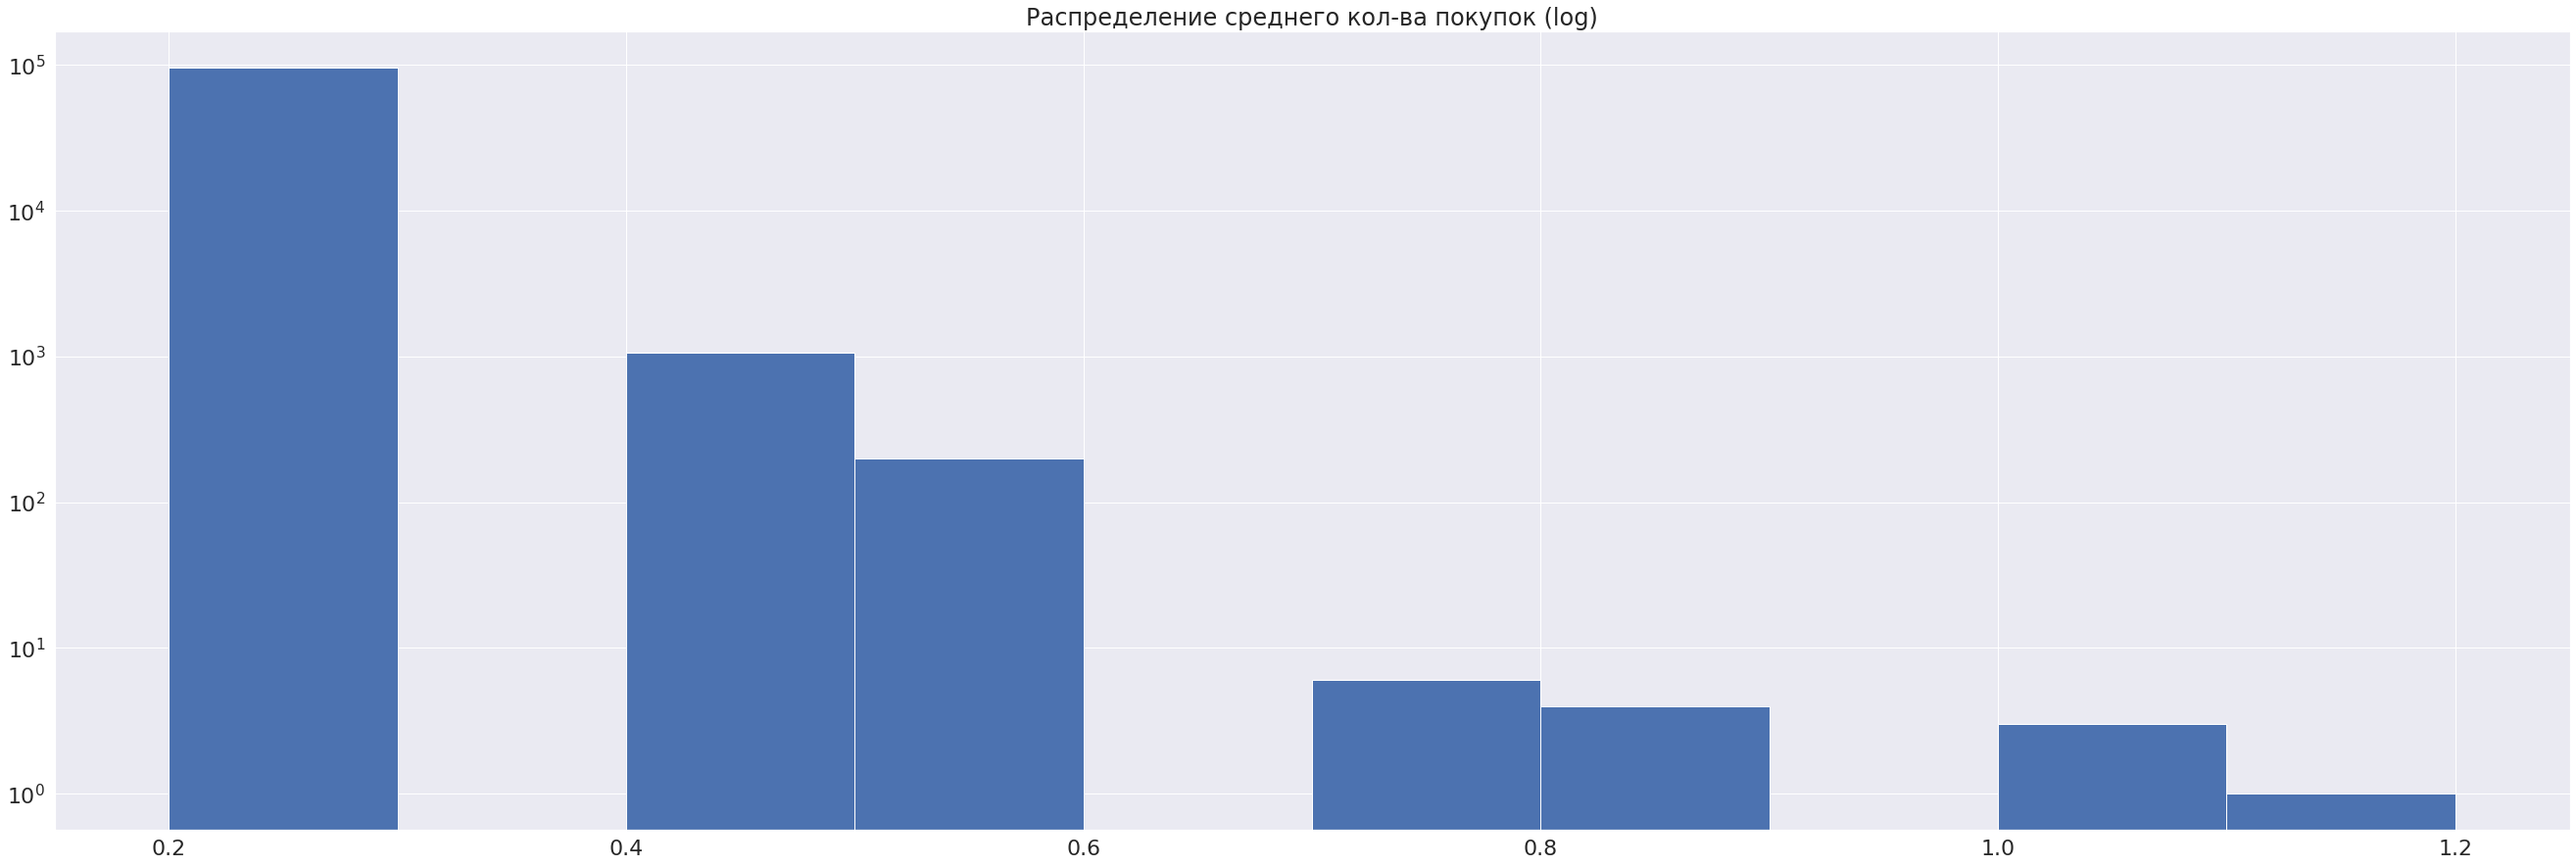

In [78]:
purchases_per_week.average_purchases_per_week.hist(log=True)
plt.title('Распределение среднего кол-ва покупок (log)')

plt.show()

### Вывод: абсолютное большинство покупателей покупает в среднем меньше чем раз в неделю (т.е. не каждую неделю).

<hr style='border:1px solid'>

## 8. Используя pandas, проводим когортный анализ пользователей. 
## В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц

<b>
Временные промежутки, по которым будут создаваться когорты - 1 месяц.
<br><br>
Действие, которое будет объединять пользователей в когорту - покупка, 
<br>которой мы считаем факт подтверждения заказа.
<br><br>

Показатель retention будем определять как отношение пользователей, 
<br>
осуществивших хотя бы одну покупку после первой в течение двух последних месяцев,
<br>к числу пользователей на начало периода.
<br><br>
Началом периода будем считать первый месяц из трех рассматриваемых в каждой когорте.

</b>

In [56]:
# На основе данных о покупках создаем новый df с уникальными id покупателей и датами подтверждения заказов

cohorts = data_purchased_items[['customer_unique_id','order_approved_at']]

In [57]:
cohorts.head()

,customer_unique_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09


In [58]:
# Убираем строки-дубликаты

cohorts = cohorts.drop_duplicates()

In [59]:
# Сортируем для удобства данные по возрастанию дат

cohorts = cohorts.sort_values(by='order_approved_at')

In [60]:
# Убираем точное время из колонки order_approved_at и оставляем только месяц покупки

cohorts['order_approved_at'] = cohorts['order_approved_at'].dt.to_period('M')

In [61]:
# Для каждого пользователя выясняем дату его первой покупки и создаем соответствующий столбец

cohorts['first_purchase'] = cohorts.groupby('customer_unique_id')['order_approved_at'].transform('min')

In [63]:
cohorts.head()

,customer_unique_id,order_approved_at,first_purchase
24001,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09
19889,14359ea0c7a105749c0a56478825b015,2016-10,2016-10
22599,87776adb449c551e74c13fc34f036105,2016-10,2016-10
24769,88bc832f104b6dd684a17dbb1b76e778,2016-10,2016-10
63630,8d3a54507421dbd2ce0a1d58046826e0,2016-10,2016-10


In [64]:
# Создаем столбец с когортами на основании даты первой покупки пользователей покупок

cohorts['cohort'] = cohorts.first_purchase

In [65]:
cohorts.head()

,customer_unique_id,order_approved_at,first_purchase,cohort
24001,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09,2016-09
19889,14359ea0c7a105749c0a56478825b015,2016-10,2016-10,2016-10
22599,87776adb449c551e74c13fc34f036105,2016-10,2016-10,2016-10
24769,88bc832f104b6dd684a17dbb1b76e778,2016-10,2016-10,2016-10
63630,8d3a54507421dbd2ce0a1d58046826e0,2016-10,2016-10,2016-10


In [66]:
# Для удобства устанавливаем столбец 'cohort' в качестве индекса

cohorts.set_index('cohort', inplace=True)

In [67]:
cohorts.head()

,customer_unique_id,order_approved_at,first_purchase
cohort,,,
2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09
2016-10,14359ea0c7a105749c0a56478825b015,2016-10,2016-10
2016-10,87776adb449c551e74c13fc34f036105,2016-10,2016-10
2016-10,88bc832f104b6dd684a17dbb1b76e778,2016-10,2016-10
2016-10,8d3a54507421dbd2ce0a1d58046826e0,2016-10,2016-10


In [68]:
# Создаем отдельынй столбец для отображения разницы между датой первой покупки и датой покупки

cohorts['months_between_first_and_current'] = cohorts['order_approved_at'].astype(int) - cohorts['first_purchase'].astype(int)

In [69]:
cohorts.head()

,customer_unique_id,order_approved_at,first_purchase,months_between_first_and_current
cohort,,,,
2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09,0
2016-10,14359ea0c7a105749c0a56478825b015,2016-10,2016-10,0
2016-10,87776adb449c551e74c13fc34f036105,2016-10,2016-10,0
2016-10,88bc832f104b6dd684a17dbb1b76e778,2016-10,2016-10,0
2016-10,8d3a54507421dbd2ce0a1d58046826e0,2016-10,2016-10,0


In [70]:
# Фильтруем df по условию разницы между датой первой покупки и очередной  либо в 0 месяцев, либо в 2. 
# Получившийся df будет основой для вычисления кол-ва покупателей в каждой из когорт в начале периода и в конце периода.

cohorts_retention = cohorts.loc[(cohorts['months_between_first_and_current'] == 0) | (cohorts['months_between_first_and_current'] == 2)]

In [71]:
cohorts_retention.head()

,customer_unique_id,order_approved_at,first_purchase,months_between_first_and_current
cohort,,,,
2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09,0
2016-10,14359ea0c7a105749c0a56478825b015,2016-10,2016-10,0
2016-10,87776adb449c551e74c13fc34f036105,2016-10,2016-10,0
2016-10,88bc832f104b6dd684a17dbb1b76e778,2016-10,2016-10,0
2016-10,8d3a54507421dbd2ce0a1d58046826e0,2016-10,2016-10,0


In [72]:
# Создаем отдельный df для вычисления кол-ва покупателей в начале периода (первый месяц)

cohorts_start_period = cohorts_retention.query('months_between_first_and_current == 0')

In [73]:
cohorts_start_period.head()

,customer_unique_id,order_approved_at,first_purchase,months_between_first_and_current
cohort,,,,
2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09,0
2016-10,14359ea0c7a105749c0a56478825b015,2016-10,2016-10,0
2016-10,87776adb449c551e74c13fc34f036105,2016-10,2016-10,0
2016-10,88bc832f104b6dd684a17dbb1b76e778,2016-10,2016-10,0
2016-10,8d3a54507421dbd2ce0a1d58046826e0,2016-10,2016-10,0


In [185]:
cohorts_start_period = cohorts_start_period.reset_index()

In [187]:
# Группируем данные по когорте и считаем покупателей в каждой из них в начале периода (первый месяц)

cohorts_start_period = cohorts_start_period.groupby('cohort') \
.agg({'customer_unique_id':'nunique'}) \
.rename(columns={'customer_unique_id':'users'})

In [188]:
cohorts_start_period

,users
cohort,
2016-09,1
2016-10,294
2016-12,1
2017-01,716
2017-02,1674
2017-03,2580
2017-04,2301
2017-05,3542
2017-06,3110


In [74]:
# Создаем отдельный df для вычисления кол-ва покупателей, которые повторно купили товары в 3 месяце своей когорты

cohorts_third_month = cohorts_retention.query('months_between_first_and_current == 2')

In [75]:
cohorts_third_month.head()

,customer_unique_id,order_approved_at,first_purchase,months_between_first_and_current
cohort,,,,
2017-01,bc2387c48428a2e128eaa3d5b18b3591,2017-03,2017-01,2
2017-01,fccfbf734a92029859c4fe58eff05114,2017-03,2017-01,2
2017-02,c51a1ea9fa9851c70f89d1178c861150,2017-04,2017-02,2
2017-02,c9c6d353f4101827b3dbc83b093b2fe6,2017-04,2017-02,2
2017-02,a5c806ebe5b25d0ab1e7f0da0e17d6bc,2017-04,2017-02,2


In [193]:
cohorts_third_month = cohorts_third_month.reset_index()

In [197]:
#  Группируем данные по когорте и считаем покупателей в каждой из них на конец исследуемого периода (третий месяц)

cohorts_third_month = cohorts_third_month.groupby('cohort') \
.agg({'customer_unique_id':'nunique'}) \
.rename(columns={'customer_unique_id':'users'})

In [198]:
cohorts_third_month

,users
cohort,
2017-01,2
2017-02,4
2017-03,9
2017-04,5
2017-05,17
2017-06,11
2017-07,12
2017-08,15
2017-09,20


In [203]:
# Объединяем два df в один по ключу когорты

final_data_retention = cohorts_start_period.merge(cohorts_third_month, how='left', on='cohort', suffixes=('_first_month','_third_month'))

In [204]:
final_data_retention

,users_first_month,users_third_month
cohort,,
2016-09,1,NaN
2016-10,294,NaN
2016-12,1,NaN
2017-01,716,2.0
2017-02,1674,4.0
2017-03,2580,9.0
2017-04,2301,5.0
2017-05,3542,17.0
2017-06,3110,11.0


In [205]:
# Заменяем пропущенные значения на 0

final_data_retention.fillna(0, inplace=True)

In [208]:
# Вычисляем retention для каждой когорты

final_data_retention['retention'] = (final_data_retention['users_third_month'] / final_data_retention['users_first_month']).mul(100).round(2)

In [211]:
# Сортируем retention по убыванию

final_data_retention.sort_values('retention', ascending=False, inplace=True)

In [214]:
final_data_retention['retention'] = final_data_retention['retention'].astype('str') + '%'

In [215]:
final_data_retention

,users_first_month,users_third_month,retention
cohort,,,
2017-09,4096,20.0,0.49%
2017-05,3542,17.0,0.48%
2018-02,6335,25.0,0.39%
2018-01,6878,26.0,0.38%
2017-11,7052,27.0,0.38%
2017-08,4154,15.0,0.36%
2017-03,2580,9.0,0.35%
2017-06,3110,11.0,0.35%
2018-03,7009,23.0,0.33%


<b> Вывод: Когорта с самым высоким коэф. Retention - 2017-09 </b>

<hr style='border: 1px solid'>

## 9. Строим RFM-сегментацию пользователей

In [76]:
# На основе данных о покупках создаем новый df с уникальными id покупателей, id заказов,
# датами подтверждения заказов и ценами на товары

RFM_data = data_purchased_items[['customer_unique_id','order_id','order_approved_at','price']]

In [77]:
RFM_data.head()

,customer_unique_id,order_id,order_approved_at,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,230.00


In [78]:
# Рассчитываем метрику R (время от последней покупки пользователя до текущей даты)

NOW = pd.to_datetime('today')
NOW

Timestamp('2023-10-21 15:21:51.512884')

In [79]:
# С помощью группировки высчитываем для каждого покупателя их RFM.

# Метрику F (частота покупок) будем рассчитывать, считатая кол-во уникальных order_id (заказов) 
# за все время для каждого из покупателей, поскольку нас интересует частота покупок, т.е. уникальных id,
# а на одном ряду может располагаться один заказ с разными товарами в нем.

# Метрику M (суммарное количество покупок у пользователя за всё время) 
# посчитаем, сложив показатели price для каждого из покупателей.


grouped_rfm = RFM_data.groupby('customer_unique_id', as_index=False) \
.agg({
    'order_approved_at': lambda x: (NOW - x.max()).days,
    'order_id': 'nunique',
    'price': 'sum'
}) \
.rename(columns={'order_approved_at':'recency','order_id':'frequency','price':'monetary'})

In [80]:
grouped_rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1990,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1992,1,18.90
2,0000f46a3911fa3c0805444483337064,2415,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2199,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2166,1,180.00


<b>Теперь необходимо рассчитать баллы RFM по шкале от 1 до 5.
<br>
Пробуем подход с присваиванием баллов каждой из метрик в зависимости от того, в какой квантиль попадает значение.</b>

In [81]:
# Считаем квантили для recency, frequency, monetary.

quantiles = grouped_rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()

In [82]:
quantiles

{'recency': {0.2: 1971.0, 0.4: 2055.0, 0.6: 2146.0, 0.8: 2261.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

<b>Судя по значениям квантилей в recency и monetary, 
<br>
    значения достаточно разнообразны, к этим столбцам можно применить квантильный подход.
<br>
    Большинство значений frequency (минимум 80%) - это 1. 
<br><br>
    Смотрим, какие есть еще значения frequency и визуализируем их распределение.

In [83]:
grouped_rfm[['frequency']].quantile([.2, .4, .6, .8, 1]).to_dict()

{'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0, 1.0: 16.0}}

In [84]:
# Видим, что частоты покупок в последнем (пятом) квантиле включают в себя разные значения, от 1 до 16.

grouped_rfm.frequency.value_counts()

1     92081
2      2650
3       188
4        29
5         9
6         5
7         3
16        1
9         1
Name: frequency, dtype: int64

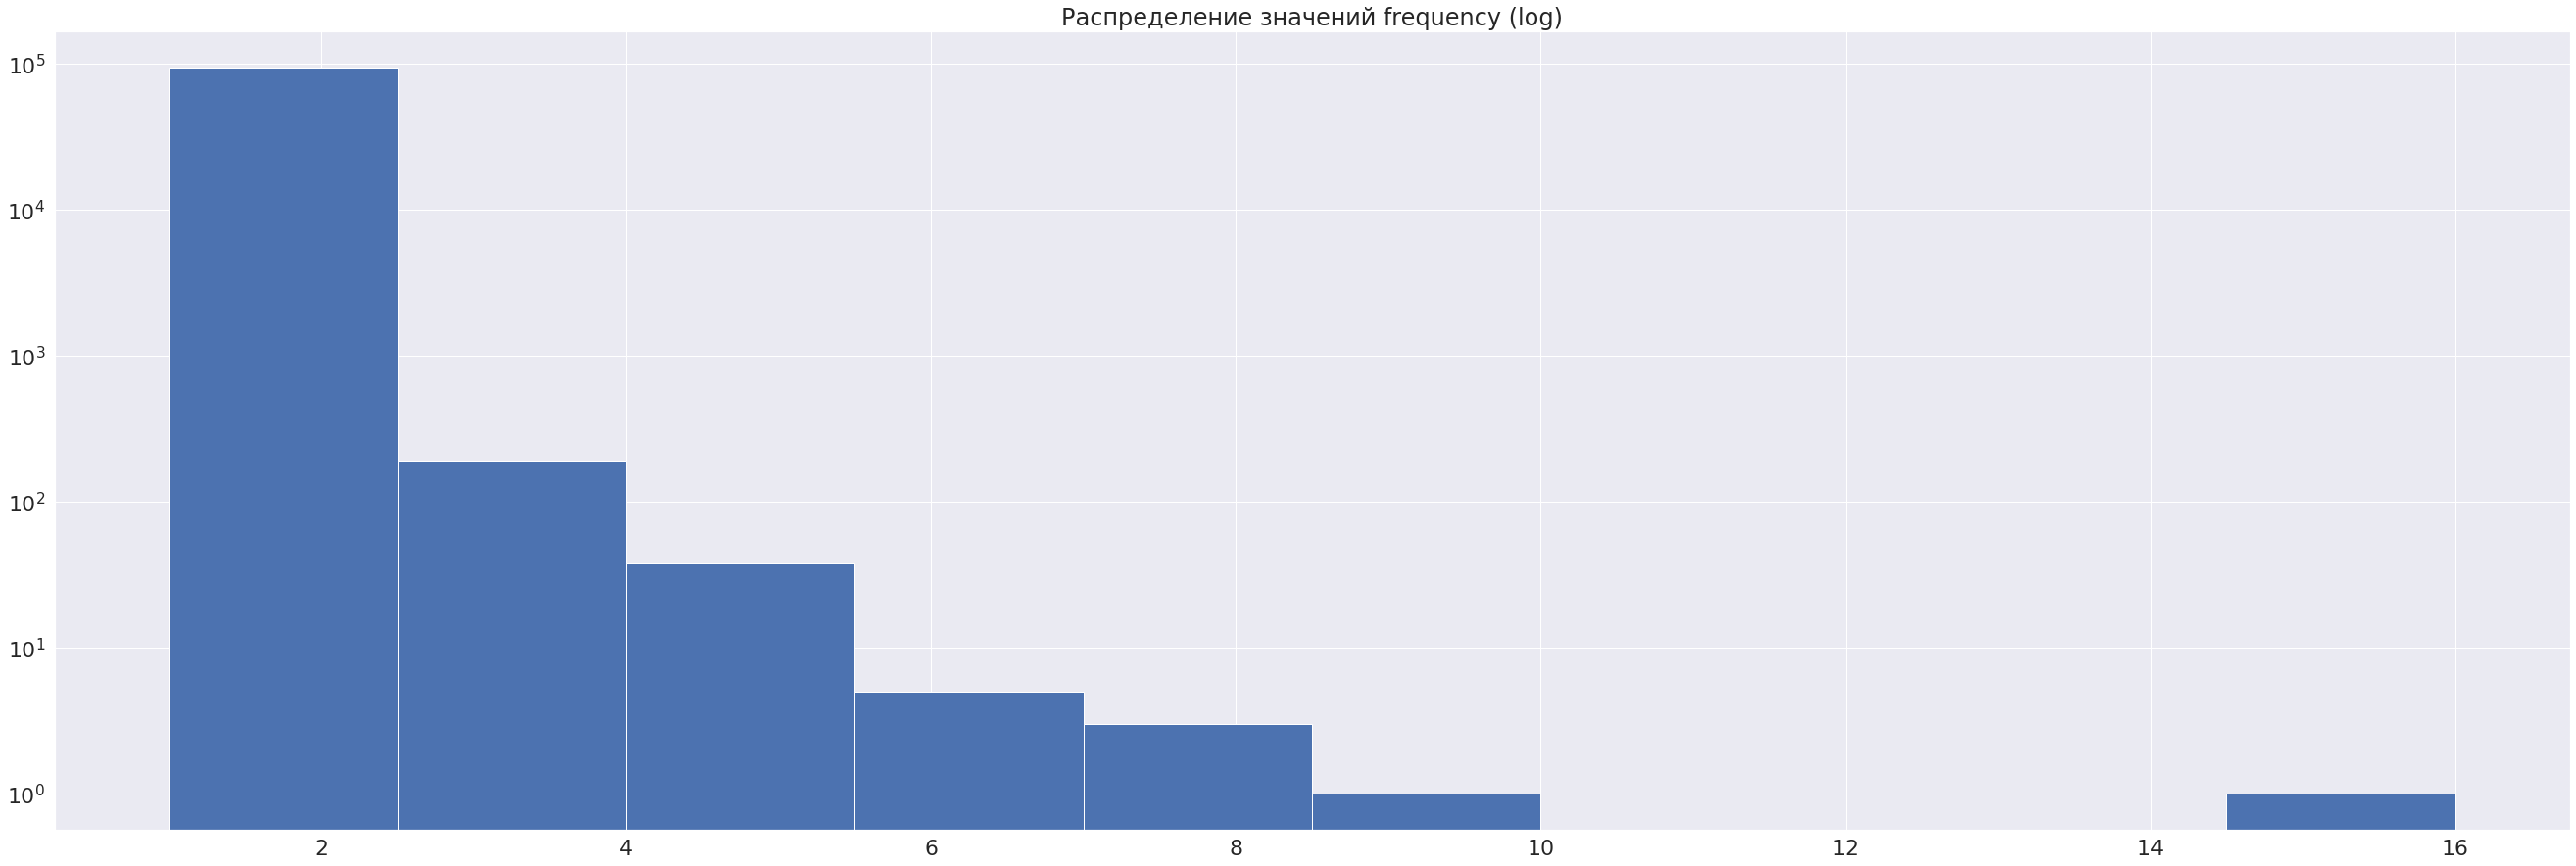

In [85]:
# Визуализируем распределение частот.

grouped_rfm.frequency.hist(log=True)
plt.title('Распределение значений frequency (log)')
plt.show()

<b>Таким образом, применив квантильный подход при присваивании баллов за частоту покупок, 
<br>мы не учтем различные значения частот в последнем квантиле. 
<br>Тем, кто покупал 2 раза, будет присвоен такой же балл, что и тем, кто покупал 16 раз,
<br>что не очень хорошо отразит разницу в рейтингах таких пользователей. 
<br><br> На основании выбранной нами шкалы баллов (от 1 до 5) и распределения частот покупок
<br>пользователей применим следующий подход: 
<br><br>
1 балл присвоится пользователям, совершившим 1 покупку;
<br>
2 балла - пользователям, совершившим 2 покупки;
<br>
3 балла - пользователям, совершившим 3 покупки;
<br>4 балла - пользователям, совершившим 4 покупки;
<br>
5 баллов - пользователям, совершившим от 5 до 16 покупок.</b>

In [86]:
# Учитывая вышеизложенное, считаем квантили только для recency, и monetary.

quantiles = grouped_rfm[['recency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()

In [87]:
quantiles

{'recency': {0.2: 1971.0, 0.4: 2055.0, 0.6: 2146.0, 0.8: 2261.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [88]:
# Для присваивания баллов значениям из столбца frequency составляем отдельный список значений

frequency_list = [1,2,3,4,16]

In [89]:
# Составляем функцию для R показателя - чем меньше дней от последней покупки до настоящего времени, тем выше будет балл.

# 5 баллов - с даты последней покупки по н.в. прошло 1926 и менее дней.
# 4 балла - с даты последней покупки по н.в. прошло от 1927 до 2010 дней.
# 3 балла - с даты последней покупки по н.в. прошло от 2011 до 2101 дня.
# 2 балла - с даты последней покупки по н.в. прошло от 2102 до 2217 дней.
# 1 балл - с даты последней покупки по н.в. прошло более 2217 дней.

def r_value(x):
    if x <= quantiles['recency'][0.2]:
        return 5
    elif x <= quantiles['recency'][0.4]:
        return 4
    elif x <= quantiles['recency'][0.6]:
        return 3
    elif x <= quantiles['recency'][0.8]:
        return 2
    else:
        return 1
        
    
    

In [90]:
# Составляем функцию для  M показателя - чем больше сумма покупок, тем выше будет балл

# 5 баллов - Пользователь совершил более 180 покупок.
# 4 балла - Пользователь совершил от 110 до 180 покупок.
# 3 балла - Пользователь совершил от 70 до 109 покупок.
# 2 балла - Пользователь совершил от 40 до 69 покупок.
# 1 балл - Пользователь совершил менее 40 покупок.

def m_value(x):
    if x <= quantiles['monetary'][0.2]:
        return 1
    elif x <= quantiles['monetary'][0.4]:
        return 2
    elif x <= quantiles['monetary'][0.6]:
        return 3
    elif x <= quantiles['monetary'][0.8]:
        return 4
    else:
        return 5

In [91]:
# Составляем функцию для F показателя - чем больше частота покупок, тем выше будет балл

# 5 баллов - пользователям, совершившим от 5 до 16 покупок.
# 4 балла - пользователям, совершившим 4 покупки.
# 3 балла - пользователям, совершившим 3 покупки.
# 2 балла - пользователям, совершившим 2 покупки.
# 1 балл присвоится пользователям, совершившим 1 покупку.


def f_value(x):
    if x == frequency_list[0]:
        return 1
    elif x == frequency_list[1]:
        return 2
    elif x == frequency_list[2]:
        return 3
    elif x == frequency_list[3]:
        return 4
    else:
        return 5

In [92]:
# Присваиваем баллы 

grouped_rfm['R'] = grouped_rfm['recency'].apply(lambda x: r_value(x))
grouped_rfm['F'] = grouped_rfm['frequency'].apply(lambda x: f_value(x))
grouped_rfm['M'] = grouped_rfm['monetary'].apply(lambda x: m_value(x))


In [93]:
grouped_rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,1990,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1992,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,2415,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,2199,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,2166,1,180.00,2,1,5


In [94]:
# Создадим RFM-группы путем объединения R, F и M значений

grouped_rfm['RFM_class'] = grouped_rfm.R.map(str) + grouped_rfm.F.map(str) + grouped_rfm.M.map(str)

In [95]:
grouped_rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_class
0,0000366f3b9a7992bf8c76cfdf3221e2,1990,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1992,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,2415,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2199,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,2166,1,180.00,2,1,5,215


<b>На основе созданных групп, каждая из которых содержит три цифры RFM (итого - потенциально 125 комбинаций цифр), 
<br>создадим более укрупненные сегменты покупателей.

За основу сегментации возьмем следующий подход с 11 сегментами:
<br><br>
		<table>
		<thead>
			<tr>
				<th>Клиентский сегмент</th>
				<th>Диапазон оценок давности</th>
				<th>Диапазон оценок частоты и денег</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Лидеры</span>&nbsp;</td>
				<td>&nbsp;4-5</td>
				<td>4-5&nbsp;</td>
			</tr>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Постоянные клиенты</span>&nbsp;</td>
				<td>2-5&nbsp;</td>
				<td>&nbsp;3-5</td>
			</tr>
            <tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Лояльные</span>&nbsp;</td>
				<td>&nbsp;3-5</td>
				<td>&nbsp;1-2/4-5</td>
			</tr>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Потенциально-лояльные</span>&nbsp;</td>
				<td>&nbsp;3-5</td>
				<td>&nbsp;1-4</td>
			</tr>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Недавние</span>&nbsp;</td>
				<td>4-5&nbsp;</td>
				<td>&nbsp;1-2</td>
			</tr>
            <tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Приоритетные перспективные</span>&nbsp;</td>
				<td>&nbsp;3-4</td>
				<td>1-2/3-5&nbsp;</td>
			</tr>
			<tr>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Перспективные</span>&nbsp;</td>
				<td>&nbsp;3-4</td>
				<td>1-2&nbsp;</td>
			</tr>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Нуждающиеся во внимании</span>&nbsp;</td>
				<td>&nbsp;2-3</td>
				<td>&nbsp;2-5</td>
			</tr>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Те, которые собираются «уснуть»</span>&nbsp;</td>
				<td>&nbsp;2-3</td>
				<td>&nbsp;1</td>
			</tr>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Клиенты под угрозой</span>&nbsp;</td>
				<td>&nbsp;1-2</td>
				<td>1-5&nbsp;</td>
			</tr>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Те, которых нельзя потерять</span>&nbsp;</td>
				<td>&nbsp;1</td>
				<td>4-5&nbsp;</td>
			</tr>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">«Уснувшие»</span>&nbsp;</td>
				<td>&nbsp;1-2</td>
				<td>1-2&nbsp;</td>
			</tr>
			<tr>
				<td><span style="color: rgb(111, 111, 111); font-family: Roboto; font-size: 14px; font-style: normal; font-weight: 400; text-align: start;">Потерянные</span>&nbsp;</td>
				<td>&nbsp;1</td>
				<td>&nbsp;1</td>
			</tr>
		</tbody>
	</table>
<!-- <table>
    <tr>
        <th>
Клиентский сегмент</th>  
         <th>
Диапазон оценок 
давности</th>  
         <th>
Диапазон оценок 
частоты и денег</th>  
    </tr>
      <tr>
          <td>Лидеры</td>
          <td>4-5</td>
          <td>4-5</td>
    </tr>  
      <tr>
          <td>Постоянные клиенты</td> 
    </tr>  
      <tr>
     <td>Потенциально-лояльные</td> 
    </tr>  
      <tr>
     <td>Недавние</td> 
    </tr>  
      <tr>
          <td>Перспективные</td>
    </tr>  
      <tr>
          <td>Нуждающиеся во внимании</td>
    </tr>  
      <tr>
          <td>Те, которые собираются «уснуть»</td>
    
    </tr>  
      <tr>
          <td>Клиенты под угрозой</td>
    </tr>  
      <tr>
          <td>Те, которых нельзя потерять</td>
    </tr>  
      <tr>
          <td>«Уснувшие»</td>
    </tr>  
      <tr>
          <td>Потерянные</td>
    </tr>  
</table>
 -->

</b>

In [96]:
# Создаем новый столбец с сегментами 

segt_map = {
     r'[1][1][1]': 'Потерянные',
    r'[1-2][1-2][1-2]': 'Уснувшие',
    r'[1][4-5][4-5]': 'Те, которых нельзя потерять',
    r'[1-2][1-5][1-5]': 'Клиенты под угрозой ',
    r'[2-3][1][1]': 'Те, которые собираются «уснуть»',
    r'[2-3][2-5][2-5]': 'Нуждающиеся во внимании',
    r'[3-4][1-2][1-2]': 'Перспективные',
    r'[3-4][1-2][3-5]': 'Приоритетные перспективные',
    r'[4-5][1-2][1-2]': 'Недавние',
    r'[3-5][1-4][1-4]': 'Потенциально-лояльные',
    r'[3-5][1-2][4-5]': 'Лояльные',
    r'[2-5][3-5][3-5]': 'Постоянные клиенты',
    r'[4-5][4-5][4-5]': 'Лидеры'
}



In [97]:
grouped_rfm['Segment'] = grouped_rfm['RFM_class'].replace(segt_map, regex=True)

In [98]:
grouped_rfm

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_class,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1990,1,129.90,4,1,4,414,Приоритетные перспективные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1992,1,18.90,4,1,1,411,Перспективные
2,0000f46a3911fa3c0805444483337064,2415,1,69.00,1,1,2,112,Уснувшие
3,0000f6ccb0745a6a4b88665a16c9f078,2199,1,25.99,2,1,1,211,Уснувшие
4,0004aac84e0df4da2b147fca70cf8255,2166,1,180.00,2,1,5,215,Клиенты под угрозой
...,...,...,...,...,...,...,...,...,...
94962,fffcf5a5ff07b0908bd4e2dbc735a684,2325,1,1570.00,1,1,5,115,Клиенты под угрозой
94963,fffea47cd6d3cc0a88bd621562a9d061,2140,1,64.89,3,1,2,312,Перспективные
94964,ffff371b4d645b6ecea244b27531430a,2446,1,89.90,1,1,3,113,Клиенты под угрозой
94965,ffff5962728ec6157033ef9805bacc48,1997,1,115.00,4,1,4,414,Приоритетные перспективные


<b>Визуализируем распределение сегментов покупателей</b>

In [99]:
# Считаем кол-во пользователей в каждом сегменте

segments = grouped_rfm.groupby('Segment',as_index=False) \
.agg({'customer_unique_id':'count'})

In [100]:
segments

,Segment,customer_unique_id
0,Клиенты под угрозой,21695
1,Лояльные,3733
2,Недавние,7805
3,Нуждающиеся во внимании,613
4,Перспективные,11435
5,Постоянные клиенты,101
6,Потенциально-лояльные,7539
7,Потерянные,4152
8,Приоритетные перспективные,21960
9,"Те, которые собираются «уснуть»",4017


In [101]:
# Делаем основу для pie графика - оставляем список из кол-ва сегментов.

number_of_segments = segments.customer_unique_id.to_list()

In [102]:
# Собираем в список названия сегментов

labels_segments = segments.Segment.to_list()

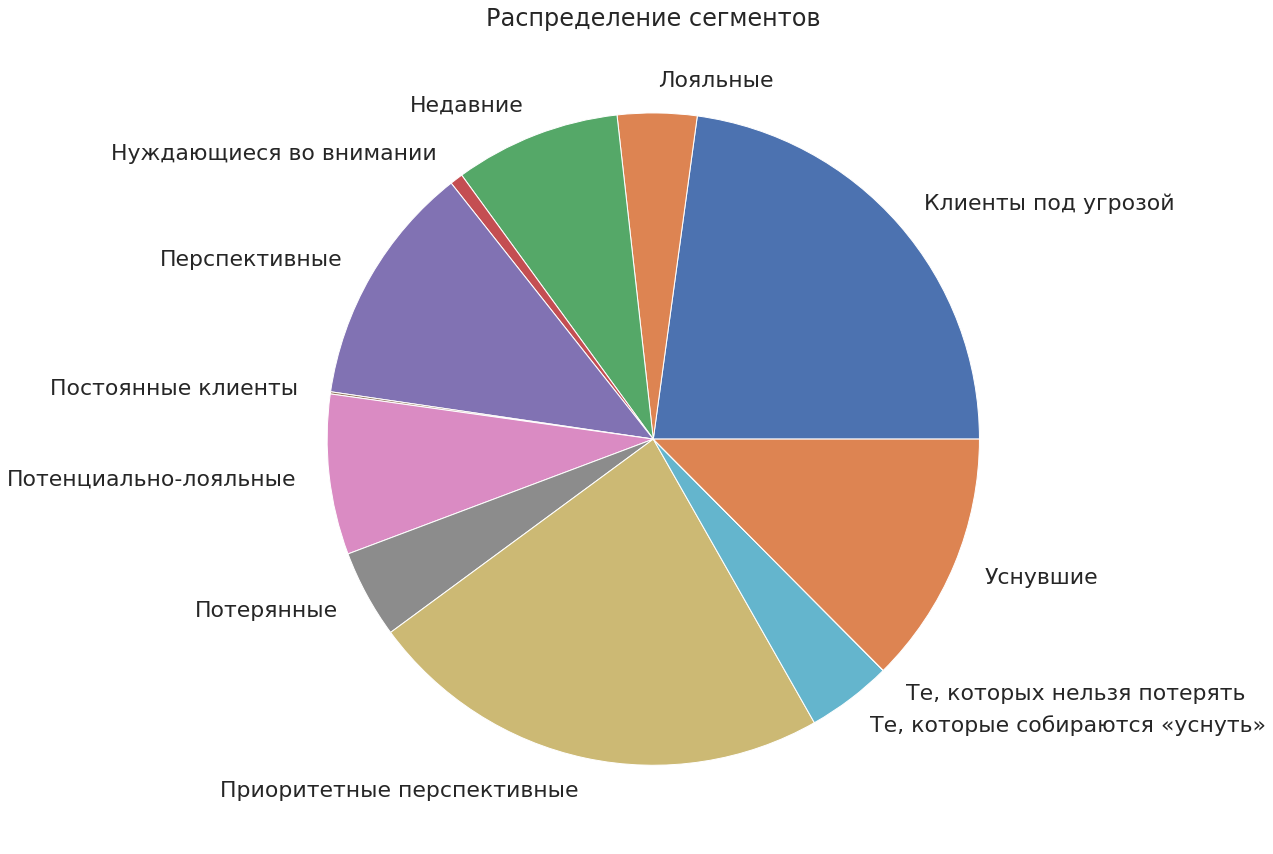

In [110]:
# Визуализируем распределение сегментов покупателей

plt.pie(number_of_segments, labels=labels_segments)
plt.title('Распределение сегментов')
plt.show()